# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv('1_7_first-regression-in-python-exercise-dataset/real_estate_price_size.csv')

In [3]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
# This method provides a very nice descriptive statistics.
data.describe()


,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [5]:
# Folowing the regression analysis, price is the dependent variable(y)
y = data['price']
# size is the independent variable(x)
x = data['size']

### Explore the data

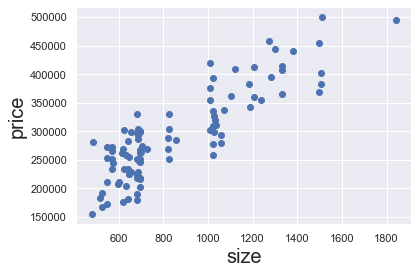

In [6]:
# plot a scatter plot(first we put the horizontal axis, secondly the vartical axis)
plt.scatter(x,y)
# label the axes
plt.xlabel('size',fontsize =20)
plt.ylabel('price',fontsize =20)
plt.show()

In general, the regression equation looks as follows:

Y = b0 + b1 * x1 + ...

In our case, this would be modified to

price = b0 + b1 * Size,

where b0 and b1 are the coefficients that statsmodels needs to estimate. They serve as the bias and the slope of this function, respectively. Notice how we haven't multiplied b0 by x0 - that is because x0 is always 1. However, statsmodels doesn't know that - we need to manually put in an additional column full of ones in the table, such that statsmodels can recognize the variable x0.

We can show this in terms of code. In the notebook provided, try modifying the code under Regression itself in the following way:

results = sm.OLS(y,x1).fit()
results.summary()
where we have skipped the definition of the variable x and have changed x to x1 inside the parentheses. Run the code. What you will see in the coefficients' table is that we only have a value for the coefficient in front of SAT namely, b1 = 329.76. We know the slope of the function but we don't know what the bias is - we don't know where our plot should start from along the y-axis.

Now, run the original version of the code namely:

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()
You now see that we have both b0 = const = 101900 and Size = b1 = 223.1787. This is because we have added this additional column of ones into our model.

### Regression itself

In [7]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x1 = sm.add_constant(x)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x1).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           8.13e-31
Time:                        13:17:43   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line on the initial scatter

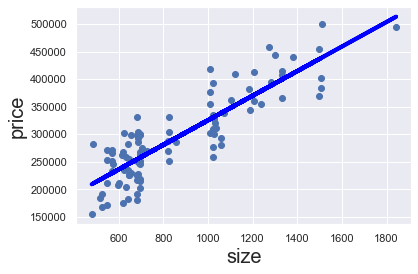

In [8]:
plt.scatter(x,y)
# Define the regression equation, so we can plot it later
yhat = 223.1787*x + 101900
# Plot the regression line against the independent variable (Size)
fig = plt.plot(x,yhat, lw = 4, c ="blue", label = "Regressio line")
#label the ax
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

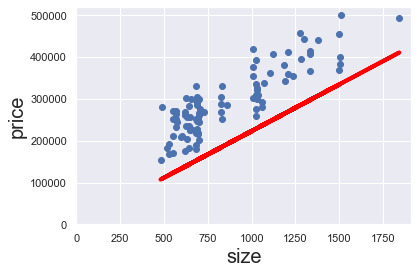

In [10]:
plt.scatter(x,y)
yhat = 223.1787*x + 0 #if b0 = 0 as p value from table is 0.00
fig = plt.plot(x,yhat,lw =4, c ='red', label = "regression line")
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.xlim(0)
plt.ylim(0)
plt.show()


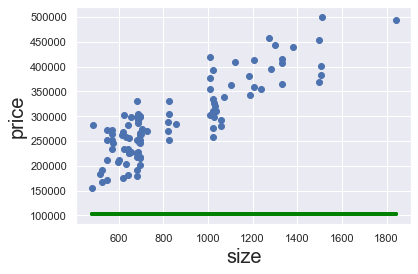

In [13]:
plt.scatter(x,y)
yhat = 0*x + 101900 #if b1 =0
fig = plt.plot(x,yhat,lw =4, c ='green', label = "regression line")
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()